In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import git, os, requests, json, pickle, time

In [3]:
years = [2017, 2018, 2019, 2020]

# Data loading and concatenating

In [15]:
analyzed_data = {}
offer_data = {}
postdoc_status = {}
for year in years:
    analyzed_data[year] = pd.read_pickle('data/analyzed_data_'+str(year))
    postdoc_status[year] = pd.read_pickle('data/postdoc_status_'+str(year))
    offer_data[year] = pd.read_pickle('data/offer_data_'+str(year))

In [30]:
X = pd.concat(postdoc_status).join(pd.concat(analyzed_data).drop(['affiliations','offers'],axis=1))

In [31]:
print(X.columns)

Index(['postdoc', 'affiliations_total', 'collaboration', 'papers_total',
       'papers_last_year', 'papers_three_years', 'citations_total',
       'citations_median', 'citations_max', 'citations_per_paper',
       'time_since_paper2', 'time_since_paper1'],
      dtype='object')


In [32]:
print('Fraction of applicants who are postdocs:', round(X['postdoc'].mean(),3))
print('Fraction of applicants in a collaboration:', round(X['collaboration'].mean(),3))

Fraction of applicants who are postdocs: 0.574
Fraction of applicants in a collaboration: 0.209


# Career-long properties

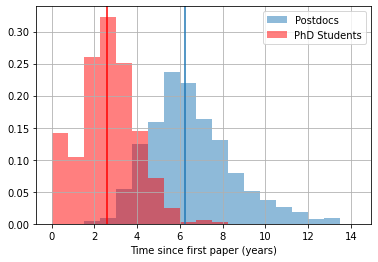

In [82]:
feature = 'time_since_paper1'
X[X['postdoc']==1][feature].hist(density=True, bins=30*np.arange(20)/40,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=30*np.arange(20)/40,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Time since first paper (years)')
plt.legend()

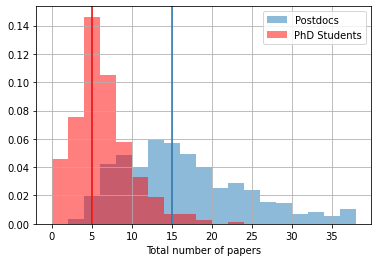

In [75]:
feature = 'papers_total'
X[X['postdoc']==1][feature].hist(density=True, bins=40*np.arange(20)/20,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=40*np.arange(20)/20,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Total number of papers')
plt.legend()

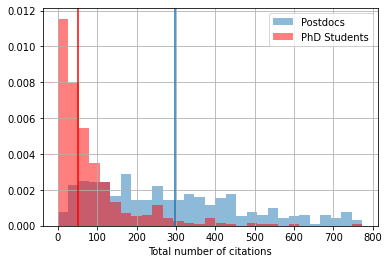

In [90]:
feature = 'citations_total'
X[X['postdoc']==1][feature].hist(density=True, bins=800*np.arange(30)/30,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=800*np.arange(30)/30,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Total number of citations')
plt.legend()

# Intensive properties

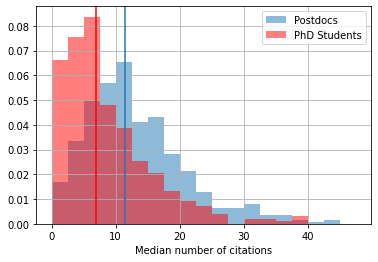

In [93]:
feature = 'citations_median'
X[X['postdoc']==1][feature].hist(density=True, bins=50*np.arange(20)/20,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=50*np.arange(20)/20,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Median number of citations')
plt.legend()

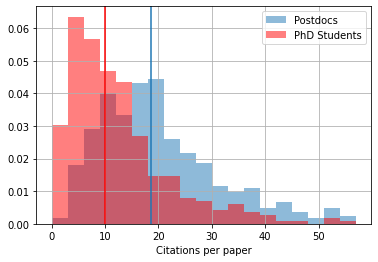

In [96]:
feature = 'citations_per_paper'
X[X['postdoc']==1][feature].hist(density=True, bins=60*np.arange(20)/20,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=60*np.arange(20)/20,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Citations per paper')
plt.legend()

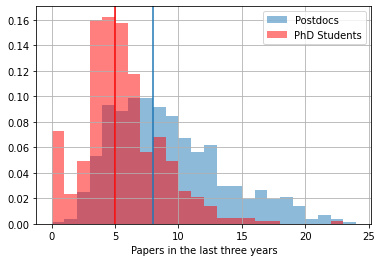

In [104]:
feature = 'papers_three_years'
X[X['postdoc']==1][feature].hist(density=True, bins=25*np.arange(25)/25,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=25*np.arange(25)/25,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Papers in the last three years')
plt.legend()

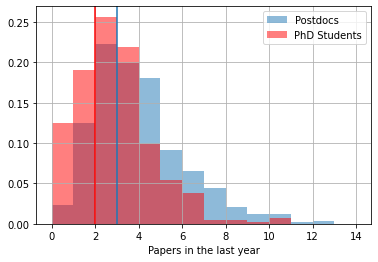

In [109]:
feature = 'papers_last_year'
X[X['postdoc']==1][feature].hist(density=True, bins=15*np.arange(15)/15,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=15*np.arange(15)/15,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Papers in the last year')
plt.legend()

# Application Results

In [110]:
Y = pd.concat(offer_data)

In [124]:
Y.columns

Index(['number_of_offers', 'first_post_time', 'round1'], dtype='object')

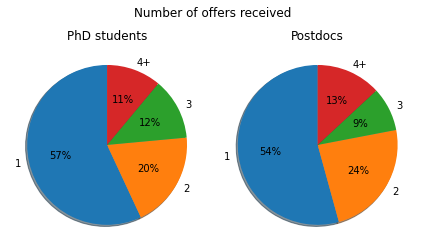

In [228]:
plt.suptitle('Number of offers received')
plt.subplot(1, 2, 2)
Y[X['postdoc']==1]['number_of_offers'].value_counts(bins=[0,1,2,3,10],sort=False).plot.pie(labels=['1','2','3','4+'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('Postdocs')
plt.ylabel('')
plt.subplot(1,2,1)
Y[X['postdoc']==0]['number_of_offers'].value_counts(bins=[0,1,2,3,10],sort=False).plot.pie(labels=['1','2','3','4+'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('PhD students')
plt.ylabel('')
plt.tight_layout()

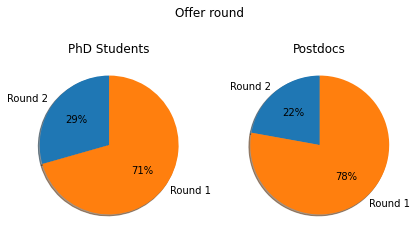

In [230]:
plt.suptitle('Offer round')
plt.subplot(1, 2, 1)
Y[X['postdoc']==0]['round1'].value_counts(sort=False).plot.pie(labels=['Round 2','Round 1'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('PhD Students')
plt.ylabel('')
plt.subplot(1,2,2)
Y[X['postdoc']==1]['round1'].value_counts(sort=False).plot.pie(labels=['Round 2','Round 1'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('Postdocs')
plt.ylabel('')
plt.tight_layout()

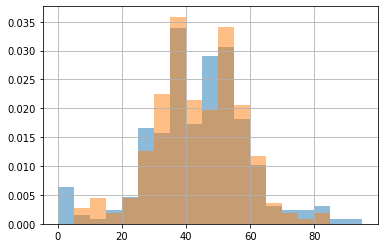

In [218]:
(Y.loc[2017]['first_post_time']-pd.to_datetime('11/15/2016')).dt.days.hist(bins=100*np.arange(20)/20,density=True,alpha=0.5)
(Y.loc[2018]['first_post_time']-pd.to_datetime('11/15/2017')).dt.days.hist(bins=100*np.arange(20)/20, density=True,alpha=0.5)

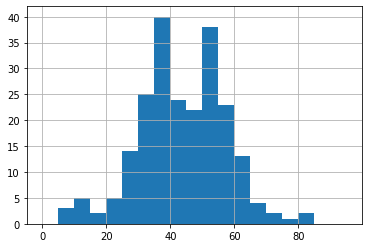

In [215]:
(Y.loc[2018]['first_post_time']-pd.to_datetime('11/15/2017')).dt.days.hist(bins=100*np.arange(20)/20)